In [1]:
%load_ext kedro.ipython

[03/28/23 09:32:49] INFO     Resolved project path as: /home/eckt/Documents/usg.                    ]8;id=675181;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=807630;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/28/23 09:32:54] INFO     Kedro project usg                                                      ]8;id=312433;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=745872;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=787167;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=195663;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

[03/28/23 09:32:57] INFO     Registered line magic 'run_viz'                                        ]8;id=640740;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=67876;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [41]:
import pandas as pd
import polars as pl
import seaborn as sb
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MultiLabelBinarizer
sb.set()

In [3]:
kaggle_steam = catalog.load('kaggle_steam')
kaggle_steam.head()

[03/28/23 09:32:59] INFO     Loading data from 'kaggle_steam' (CSVDataSet)...                   ]8;id=820044;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=459578;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


<Axes: xlabel='median_playtime'>

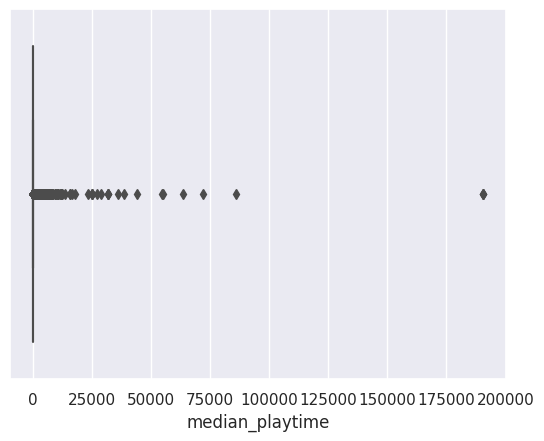

In [4]:
sb.boxplot(data=kaggle_steam, x="median_playtime")

<Axes: xlabel='median_playtime', ylabel='Count'>

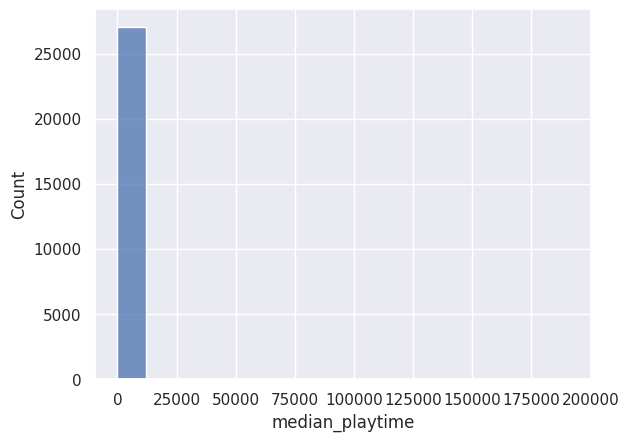

In [5]:
sb.histplot(data=kaggle_steam["median_playtime"])

<Axes: xlabel='median_playtime', ylabel='Count'>

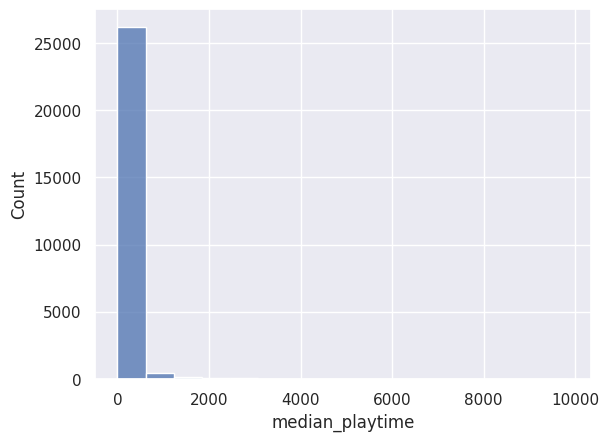

In [6]:
median_playtime = kaggle_steam['median_playtime']
sb.histplot(data=median_playtime.loc[(median_playtime < 10000)])

<Axes: xlabel='median_playtime', ylabel='Count'>

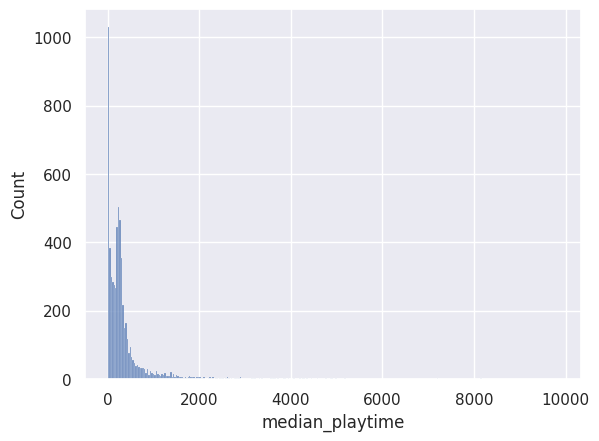

In [7]:
sb.histplot(data=median_playtime.loc[(0 < median_playtime) & (median_playtime < 10000)])

In [24]:
kaggle_steam['owners'].value_counts().index.str.split('-').map(lambda x: int(x[1])).map(np.log10)

Float64Index([4.301029995663981, 4.698970004336019,               5.0,
              5.301029995663981, 5.698970004336019,               6.0,
              6.301029995663981, 6.698970004336019,               7.0,
              7.301029995663981, 7.698970004336019,               8.0,
              8.301029995663981],
             dtype='float64')

In [27]:
kaggle_steam['release_date'].str.split('-').map(lambda x: int(x[0])).value_counts()

2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_date, dtype: int64

In [28]:
kaggle_steam['platforms'].value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

<Axes: >

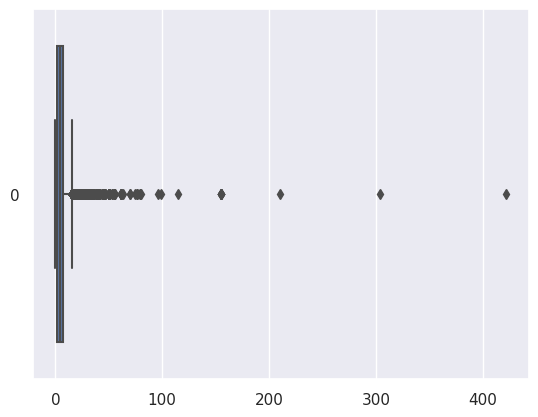

In [30]:
sb.boxplot(data=kaggle_steam['price'], orient='h')

<Axes: xlabel='price', ylabel='Count'>

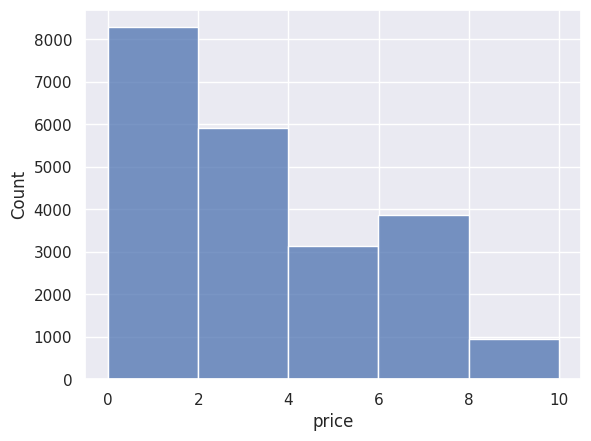

In [40]:
sb.histplot(data=kaggle_steam[kaggle_steam['price'] < 10], x='price', bins=5)

In [68]:
mlb = MultiLabelBinarizer()
platforms = mlb.fit_transform(kaggle_steam['platforms'].str.split(';')).T
for i, platform in enumerate(mlb.classes_):
    kaggle_steam[platform] = platforms[i]

kaggle_steam[["platforms", "windows", "mac", "linux"]]


,platforms,windows,mac,linux
0,windows;mac;linux,1,1,1
1,windows;mac;linux,1,1,1
2,windows;mac;linux,1,1,1
3,windows;mac;linux,1,1,1
4,windows;mac;linux,1,1,1
...,...,...,...,...
27070,windows,1,0,0
27071,windows,1,0,0
27072,windows,1,0,0
27073,windows;mac,1,1,0


In [70]:
mlb = MultiLabelBinarizer()
categories = mlb.fit_transform(kaggle_steam['categories'].str.split(';')).T
for i, category in enumerate(mlb.classes_):
    if (category in {"Single-player", "Multi-player"}):
      kaggle_steam[category] = categories[i]

kaggle_steam[["categories", "Single-player", "Multi-player"]]

,categories,Single-player,Multi-player
0,Multi-player;Online Multi-Player;Local Multi-P...,0,1
1,Multi-player;Online Multi-Player;Local Multi-P...,0,1
2,Multi-player;Valve Anti-Cheat enabled,0,1
3,Multi-player;Online Multi-Player;Local Multi-P...,0,1
4,Single-player;Multi-player;Valve Anti-Cheat en...,1,1
...,...,...,...
27070,Single-player;Steam Achievements,1,0
27071,Single-player,1,0
27072,Single-player;Multi-player;Co-op;Shared/Split ...,1,1
27073,Single-player;Steam Cloud,1,0


In [64]:
linux

array([1, 1, 1, ..., 0, 0, 0])